<a href="https://colab.research.google.com/github/lsmanoel/BasicOfPython/blob/master/BasicOfTensorflow/Tensorflow_Spectral_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensroflow - Module: tf.spectral 

[tf.spectral  Overview](https://www.tensorflow.org/api_docs/python/tf/spectral)

# Discrete Cosine Transform -(DCT)

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Image, inverse DCT of image and DCT of each channel (RGB respectively)
(323, 570, 3)


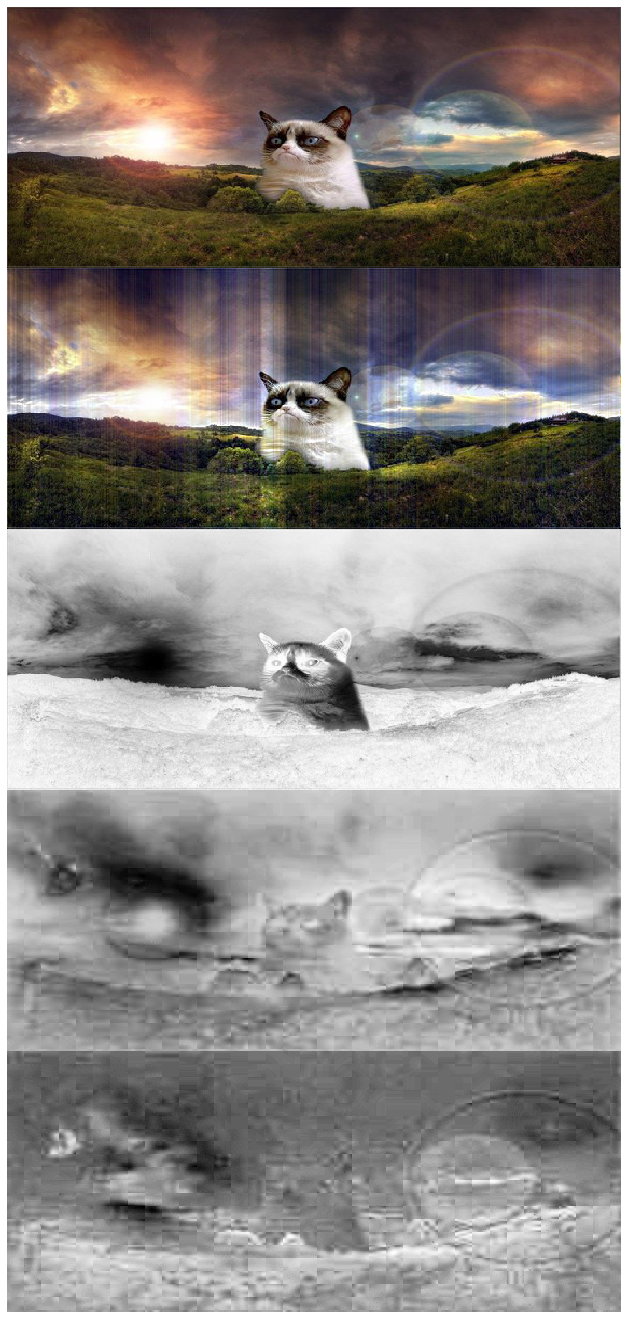

In [162]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

folder_path = "gdrive/My Drive/Colab Notebooks/datasets_image"
dataset_folder = "landscapes"
file_name = "landscape_landcat_02.jpg"
result_path = os.path.join(folder_path, dataset_folder, file_name)
image = plt.imread(result_path)

image = image/255
#DCT
dct_image = tf.spectral.dct(image)
#Inverse DCT
idct_image = tf.spectral.idct(dct_image, type=2, norm=None)

sess = tf.Session()
#DCT
dct_image_result = sess.run(dct_image)
#Inverse DCT
idct_image_result = sess.run(idct_image)

#===============================================================================
print("Image, inverse DCT of image and DCT of each channel (RGB respectively)")
print(dct_image_result.shape)
numberOfChannels = dct_image_result.shape[2]

fig = plt.figure(figsize=(11,8*numberOfChannels))
ax = [fig.add_subplot(numberOfChannels+2, 
                      1, 
                      index+1) 
      for index in range(numberOfChannels+2)]

#===============================================================================
#Original Image
ax[0].imshow(image)
ax[0].grid(False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_aspect('auto')

#===============================================================================
#Inverse DCT Image
scaler = MinMaxScaler(feature_range=(0, 1))
for channel in range(numberOfChannels):
  scaler = scaler.fit(idct_image_result[:, :, channel])
  idct_image_result[:, :, channel] = scaler.transform(idct_image_result[:, :, channel])
  
ax[1].imshow(idct_image_result)
ax[1].grid(False)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_aspect('auto')

#===============================================================================
#DCT of each channel () RGB
for channel in range(numberOfChannels):
  ax[channel+2].imshow(dct_image_result[:, :, channel])
  ax[channel+2].grid(False)
  ax[channel+2].set_xticklabels([])
  ax[channel+2].set_yticklabels([])
  ax[channel+2].set_aspect('auto')
  
fig.subplots_adjust(wspace=0, hspace=0)



**Inverse DCT**

# Fast Fourier Transform - (FFT)

The **Normal** (or **Gaussian** or ** Gauss** or **Laplace–Gauss**) distribution:

$$\varphi(x|\mu, \sigma²)=\frac{1}{\sqrt{2 \pi \sigma}}e^{-\frac{(x-\mu)^2}{2 \sigma²}}$$

where:

*   $\mu$ (micro)  is the **mean** or **expectation** of the distribution (and also its median and mode).
*   $\sigma$ (sigma) is the **standard deviation**.
*   $\sigma²$ is the **variance**.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/350px-Normal_Distribution_PDF.svg.png)



**FFT calculation  of a White Gaussian Noise:**

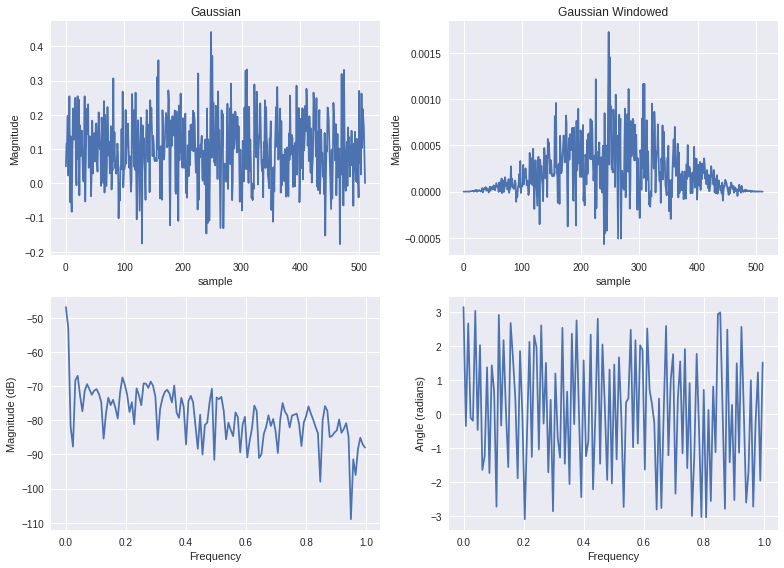

In [18]:
import tensorflow as tf
import numpy as np
import scipy
from scipy.signal import windows
import matplotlib.pyplot as plt
%matplotlib inline

# size of x axis, mean and standard deviation
N, micro, sigma = 512, 0.1, 0.1
gaussian = tf.cast(np.random.normal(micro, sigma, N), tf.float32)
zeroPadArray = tf.cast(np.zeros(N), tf.float32)
w = tf.cast(windows.hann(N), tf.float32)

window_norm = tf.div(w, tf.reduce_sum(w))
windowed_input = tf.multiply(gaussian, window_norm)

dd = tf.concat([[windowed_input],[zeroPadArray]],axis = 0)
c_input = tf.complex(dd[0,:], dd[1,:])

Spec = tf.fft(c_input)
abs_fft = tf.abs(Spec) 
arg_fft = tf.angle(Spec)

sess = tf.Session()
fft_abs_result = sess.run(abs_fft)
fft_arg_result = sess.run(arg_fft)
windowed_input_result = sess.run(windowed_input)
gaussian_result = sess.run(gaussian)

fig = plt.figure(figsize=(11,8))
#===============================================================================  
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(gaussian_result)
ax1.set_title('Gaussian')
ax1.set_xlabel('sample')
ax1.set_ylabel('Magnitude')
ax1.grid(True)
#===============================================================================
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(windowed_input_result)
ax2.set_title('Gaussian Windowed')
ax2.set_xlabel('sample')
ax2.set_ylabel('Magnitude')
ax2.grid(True)
#===============================================================================
ax3 = fig.add_subplot(2, 2, 3)
ax3.magnitude_spectrum(fft_abs_result[int(len(fft_abs_result)/2):-1], scale='dB')
ax3.grid(True)
#===============================================================================
ax4 = fig.add_subplot(2, 2, 4)
ax4.angle_spectrum(fft_arg_result[int(len(fft_arg_result)/2):-1])
ax4.grid(True)
#===============================================================================
fig.tight_layout()
plt.show()